In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocessing Part 1 

In [3]:
df.shape

(7043, 21)

In [4]:
df.drop(columns='customerID', inplace=True)

In [5]:
df.duplicated().sum()

22

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [12]:
cols = df.columns
for i in cols:
    print(i, df[i].unique(), '\n')

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


# Customer Demographics

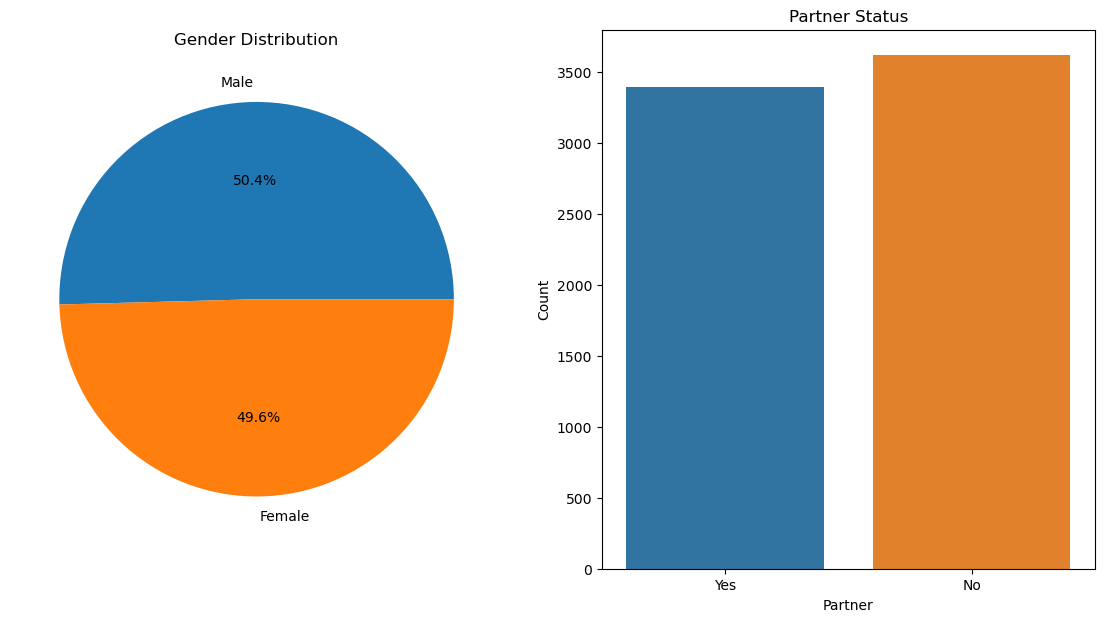

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax1.pie(df['gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
ax1.set_title('Gender Distribution')
sns.countplot(x='Partner', data=df, ax=ax2)
ax2.set_title('Partner Status')
ax2.set_xlabel('Partner')
ax2.set_ylabel('Count')
plt.show()

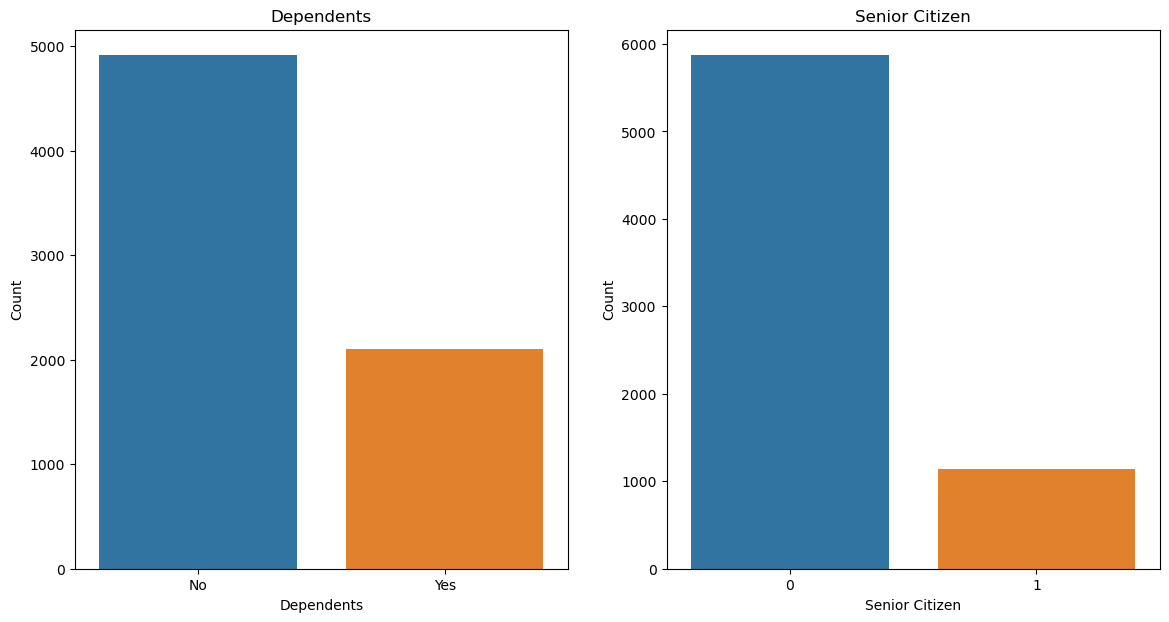

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.barplot(x=df['Dependents'].value_counts().index, y=df['Dependents'].value_counts(), ax=ax1)
ax1.set_title('Dependents')
ax1.set_xlabel('Dependents')
ax1.set_ylabel('Count')

sns.countplot(x='SeniorCitizen', data=df, ax=ax2)
ax2.set_title('Senior Citizen')
ax2.set_xlabel('Senior Citizen')
ax2.set_ylabel('Count')
plt.show()

# Services

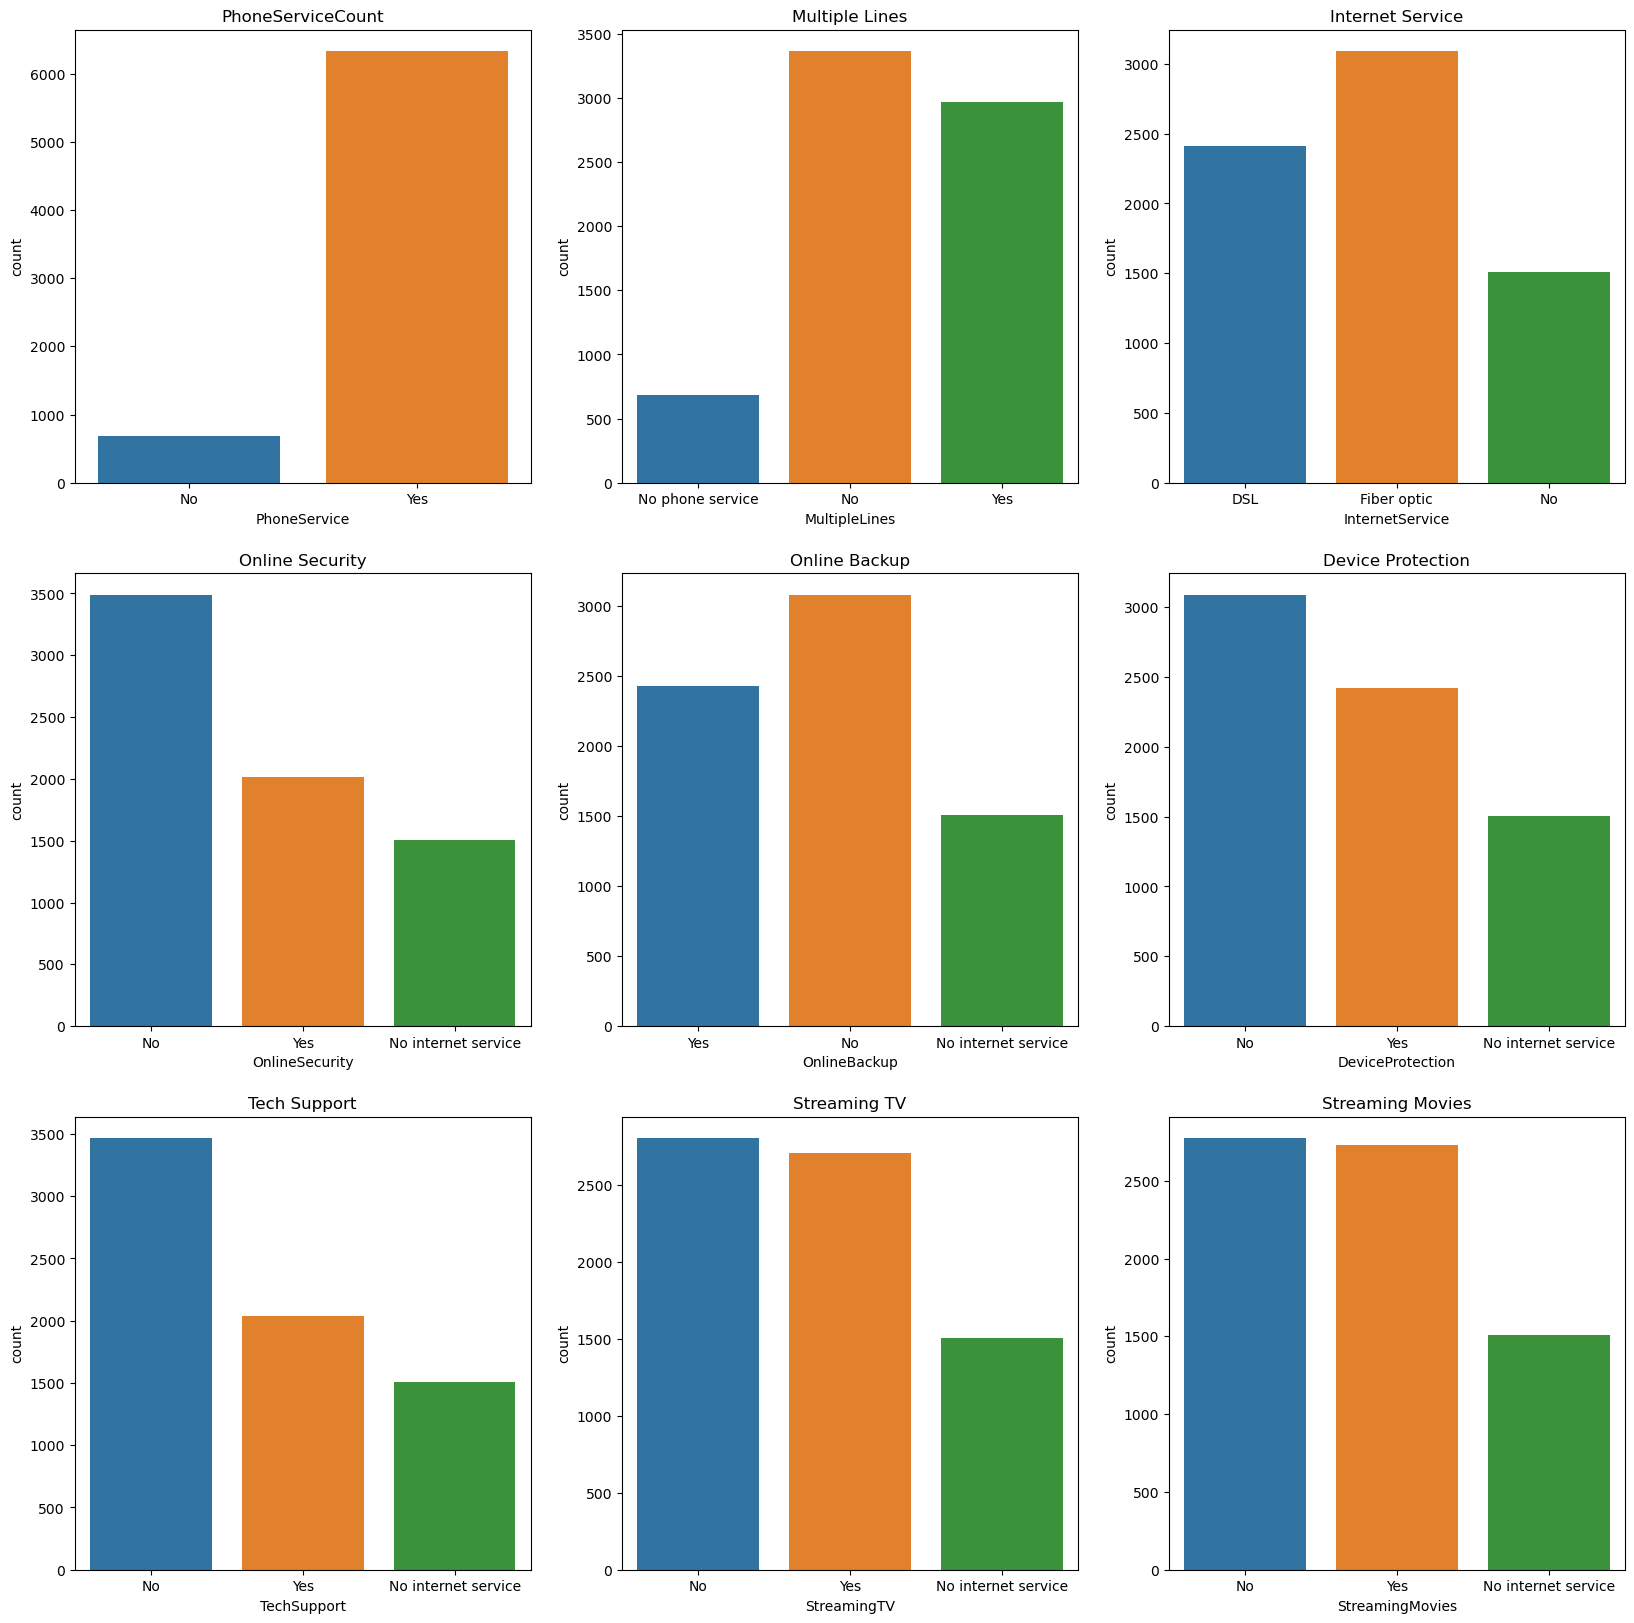

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
sns.countplot(x='PhoneService', data=df, ax=ax[0, 0]).set_title('PhoneServiceCount')
sns.countplot(x='MultipleLines', data=df, ax=ax[0, 1]).set_title('Multiple Lines')
sns.countplot(x='InternetService', data=df, ax=ax[0, 2]).set_title('Internet Service')
sns.countplot(x='OnlineSecurity', data=df, ax=ax[1, 0]).set_title('Online Security')
sns.countplot(x='OnlineBackup', data=df, ax=ax[1, 1]).set_title('Online Backup')
sns.countplot(x='DeviceProtection', data=df, ax=ax[1, 2]).set_title('Device Protection')
sns.countplot(x='TechSupport', data=df, ax=ax[2, 0]).set_title('Tech Support')
sns.countplot(x='StreamingTV', data=df, ax=ax[2, 1]).set_title('Streaming TV')
sns.countplot(x='StreamingMovies', data=df, ax=ax[2, 2]).set_title('Streaming Movies')
plt.show()


# Tenure and Contract

Text(0.5, 1.0, 'Contract Type')

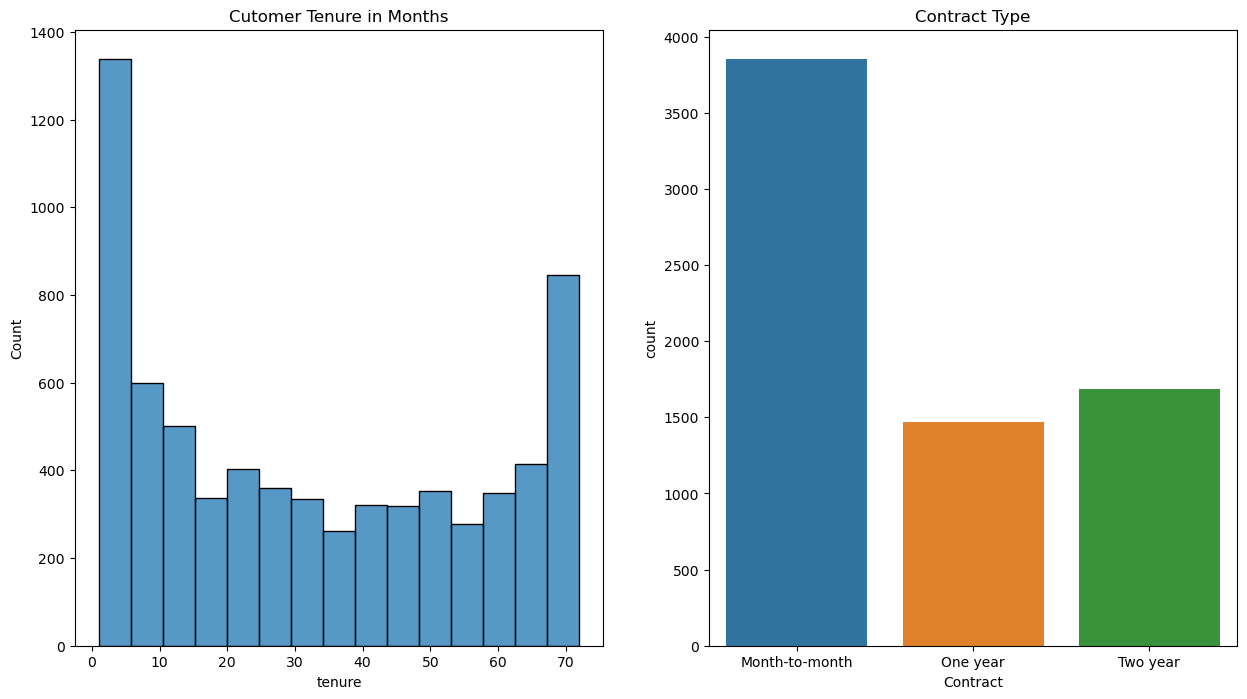

In [17]:
 fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(x = 'tenure', data = df, ax= ax[0]).set_title('Cutomer Tenure in Months')
sns.countplot(x = 'Contract', data = df, ax= ax[1]).set_title('Contract Type')

# Billing and Charges

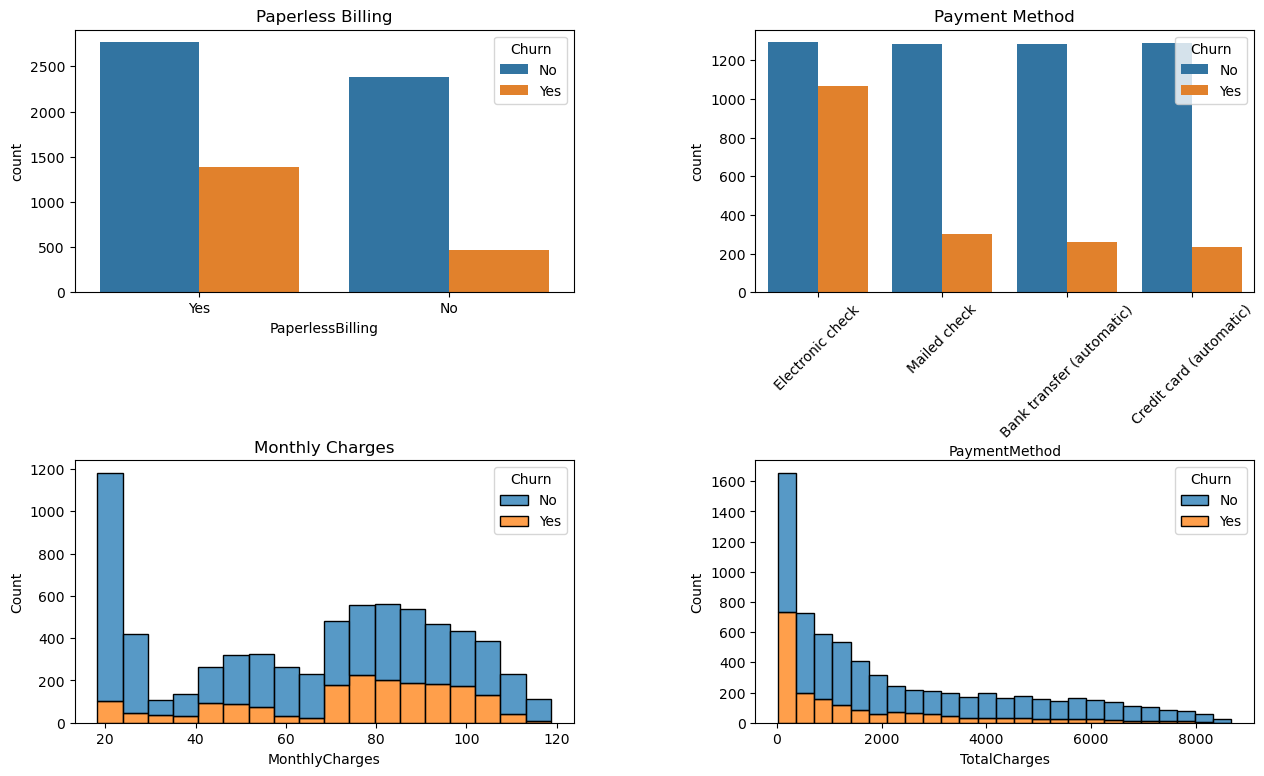

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=10)
# Paperless billing
sns.countplot(x='PaperlessBilling', data=df, ax=ax[0, 0], hue='Churn').set_title('Paperless Billing')
# Payment Method
sns.countplot(x='PaymentMethod', data=df, ax=ax[0, 1], hue='Churn').set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=45)

# Monthly Charges
sns.histplot(x='MonthlyCharges', data=df, ax=ax[1, 0], hue='Churn', multiple='stack').set_title('Monthly Charges')

# Total Charges
sns.histplot(x='TotalCharges', data=df, ax=ax[1, 1], hue='Churn', multiple='stack')

plt.show()

# Churn Count

Text(0.5, 1.0, 'Churn Count')

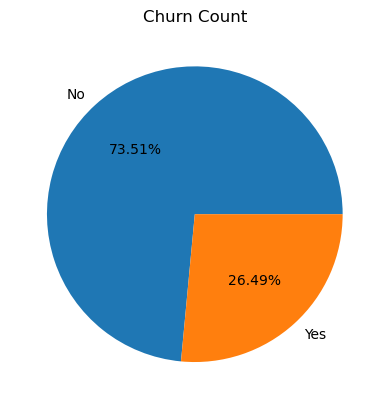

In [19]:
plt.pie(x = df['Churn'].value_counts(), labels = df['Churn'].unique(), autopct = '%1.2f%%')
plt.title('Churn Count')

# Customer Demogrpahics and Churn

Text(0.5, 1.0, 'Dependents and Churn')

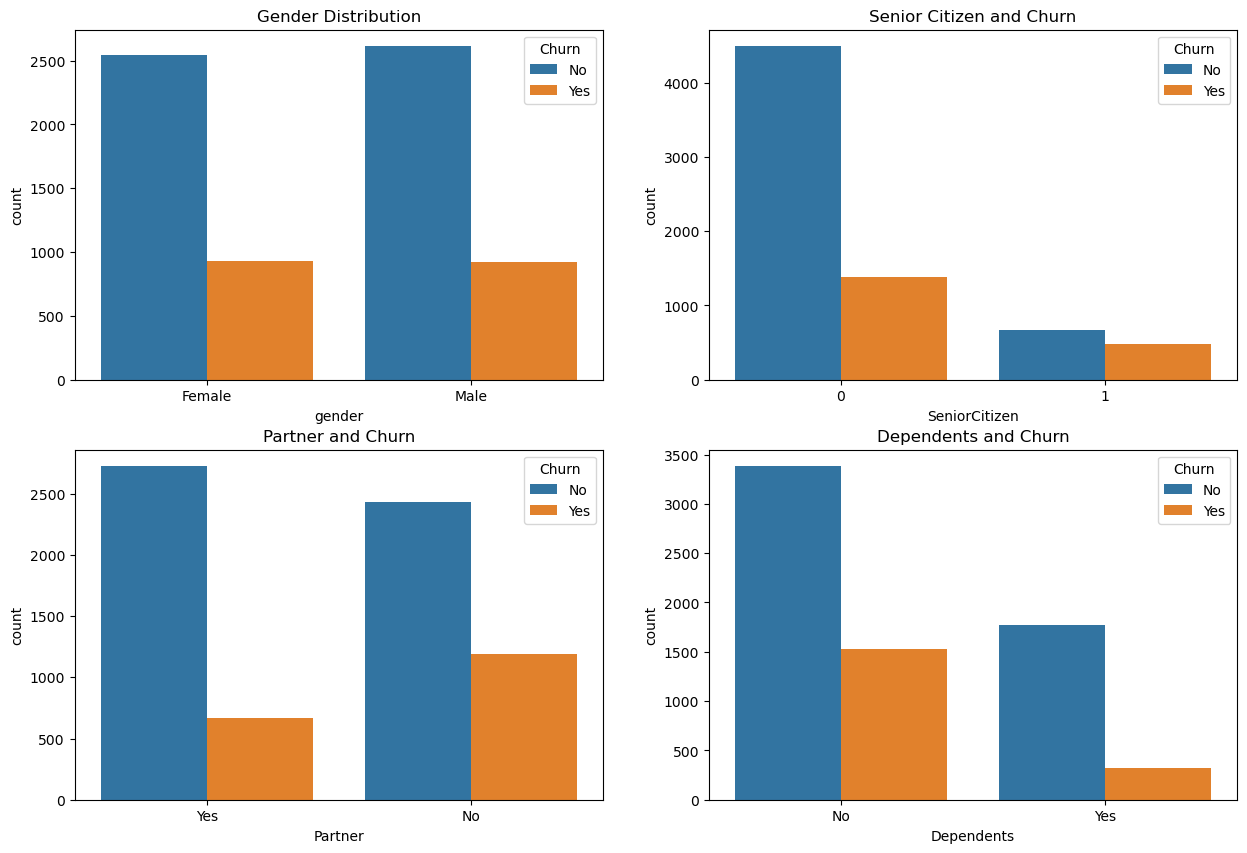

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#Gender Distribution
sns.countplot(x = 'gender', data = df, hue = 'Churn', ax=ax[0,0])
ax[0,0].set_title('Gender Distribution')

#Senior Citizen Distribution
sns.countplot(x = df['SeniorCitizen'], ax=ax[0,1], hue = df['Churn']).set_title('Senior Citizen and Churn')

#Partner Distribution
sns.countplot( x = df['Partner'], ax=ax[1,0], hue = df['Churn']).set_title('Partner and Churn')

#Dependents Distribution
sns.countplot(x = df['Dependents'], ax=ax[1,1], hue = df['Churn']).set_title('Dependents and Churn')

# Services and Churn

Text(0.5, 1.0, 'Streaming Movies')

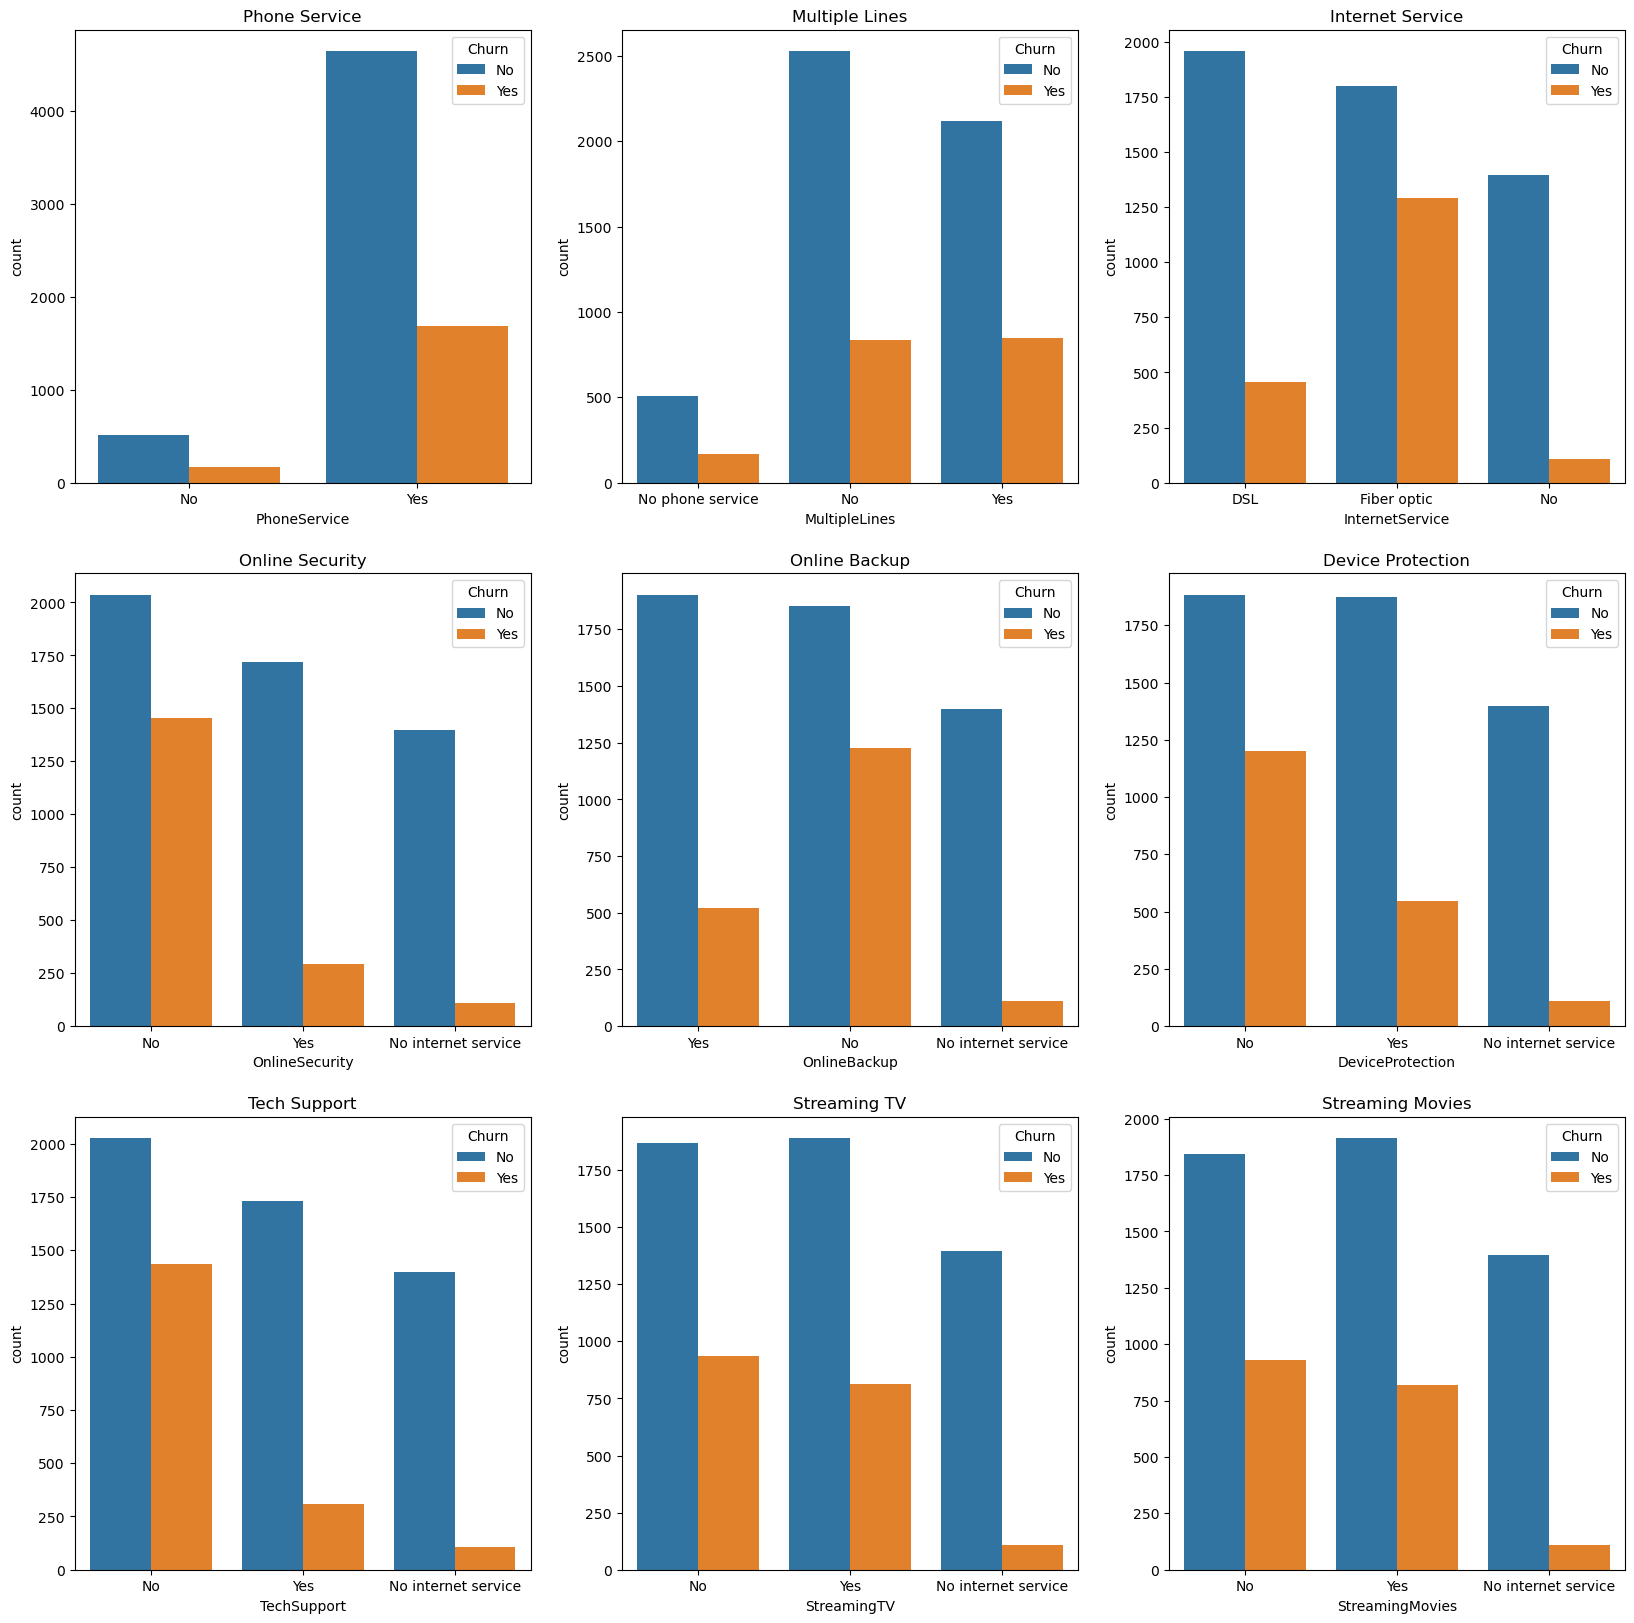

In [21]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
#phone service
sns.countplot(x = df['PhoneService'], ax=ax[0,0], hue = df['Churn']).set_title('Phone Service')
ax[0,0].set_title('Phone Service')
#Multiple Lines
sns.countplot(x = df['MultipleLines'], ax=ax[0,1], hue = df['Churn']).set_title('Multiple Lines')
ax[0,1].set_title('Multiple Lines')
#Internet Service
sns.countplot(x = df['InternetService'], ax=ax[0,2], hue = df['Churn']).set_title('Internet Service')
ax[0,2].set_title('Internet Service')
#Online Security
sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0], hue = df['Churn']).set_title('Online Security')
ax[1,0].set_title('Online Security')
#Online Backup
sns.countplot(x = df['OnlineBackup'], ax=ax[1,1], hue = df['Churn']).set_title('Online Backup')
ax[1,1].set_title('Online Backup')
#Device Protection
sns.countplot(x = df['DeviceProtection'], ax=ax[1,2], hue = df['Churn']).set_title('Device Protection')
ax[1,2].set_title('Device Protection')
#Tech Support
sns.countplot(x = df['TechSupport'], ax=ax[2,0], hue = df['Churn']).set_title('Tech Support')
ax[2,0].set_title('Tech Support')
#Streaming TV
sns.countplot(x = df['StreamingTV'], ax=ax[2,1], hue = df['Churn']).set_title('Streaming TV')
ax[2,1].set_title('Streaming TV')
#Streaming Movies
sns.countplot(x = df['StreamingMovies'], ax=ax[2,2], hue = df['Churn']).set_title('Streaming Movies')
ax[2,2].set_title('Streaming Movies')

# Tenure/Contract and Churn

Text(0.5, 1.0, 'Contract Type and Churn')

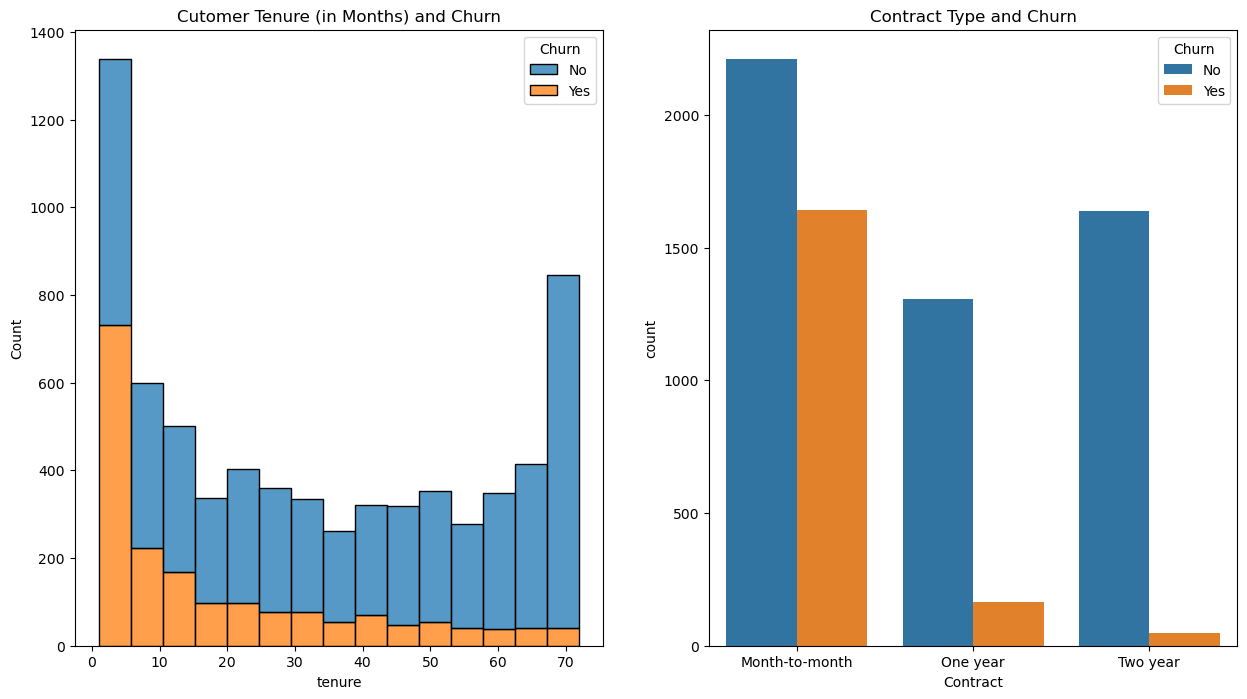

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(x = 'tenure', data = df, ax= ax[0], hue = 'Churn', multiple = 'stack').set_title('Cutomer Tenure (in Months) and Churn')
sns.countplot(x = 'Contract', data = df, ax= ax[1], hue = 'Churn').set_title('Contract Type and Churn')

# Billing/Charges and Churn

Text(0.5, 1.0, 'Total Charges')

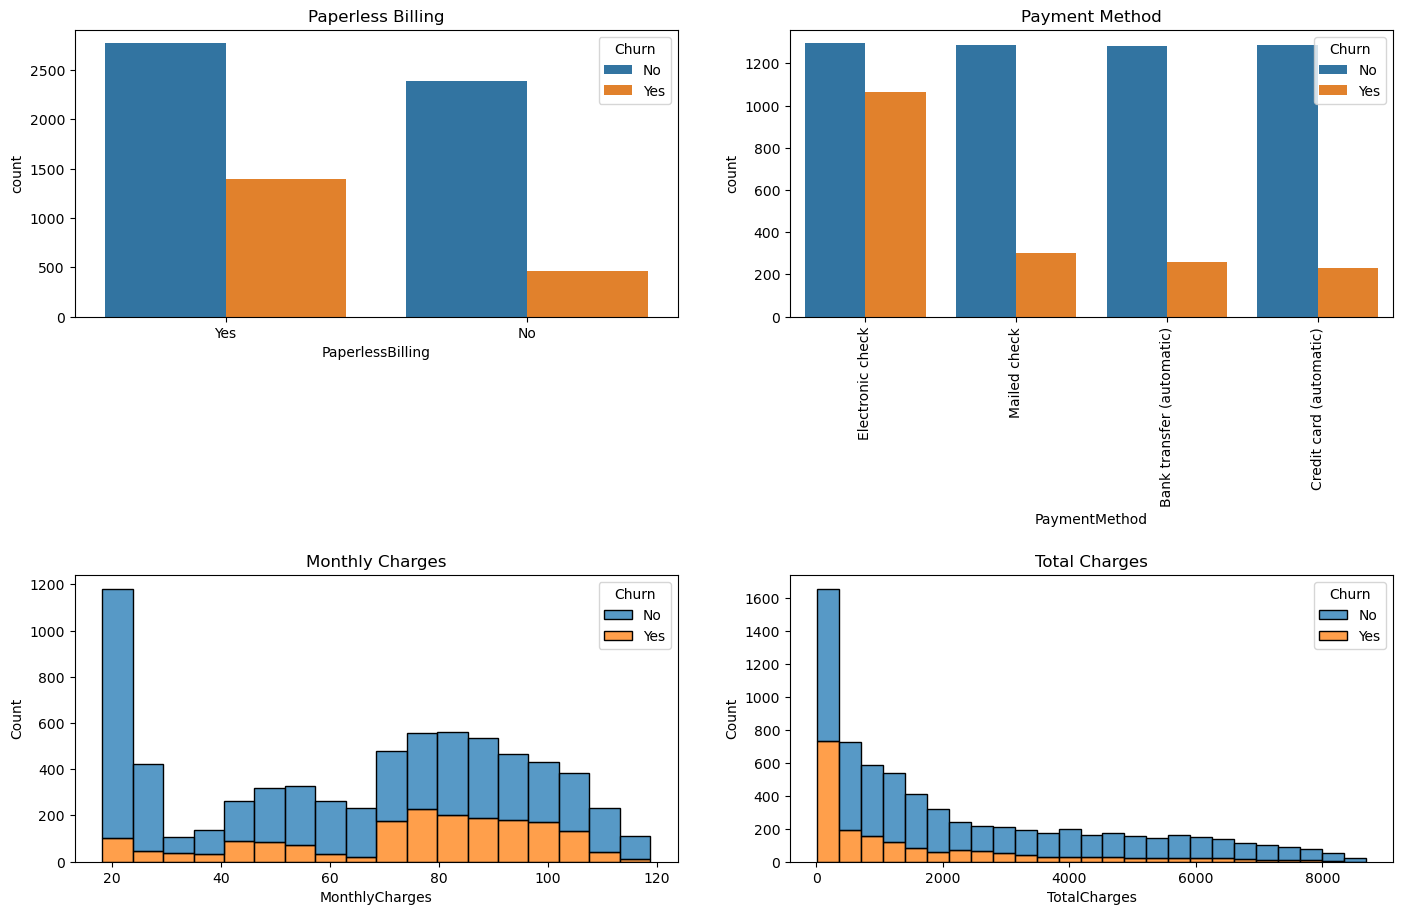

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=5.0)

#spacing between subplots
fig.subplots_adjust(hspace=0.9)


#papaerless billing
sns.countplot(x = df['PaperlessBilling'], ax=ax[0,0], hue = df['Churn']).set_title('Paperless Billing')

#Payment Method
sns.countplot(x = df['PaymentMethod'], ax=ax[0,1], hue = df['Churn']).set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=90)

#Monthly Charges
sns.histplot(x = 'MonthlyCharges', data = df, ax = ax[1,0], hue = 'Churn', multiple= 'stack').set_title('Monthly Charges')

#Total Charges
sns.histplot(x = 'TotalCharges', data = df, ax = ax[1,1], hue = 'Churn', multiple= 'stack').set_title('Total Charges')

# Data Preprocessing Part 2

In [24]:
#Columns for outlier removal
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Using IQR method to remove outliers
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#Removing the outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

#colums for label encoding
cols = df.columns[df.dtypes == 'object']

#Label encoder object
le = LabelEncoder()

#Label encoding the columns
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique(), '\n')

gender [0 1] 

Partner [1 0] 

Dependents [0 1] 

PhoneService [0 1] 

MultipleLines [1 0 2] 

InternetService [0 1 2] 

OnlineSecurity [0 2 1] 

OnlineBackup [2 0 1] 

DeviceProtection [0 2 1] 

TechSupport [0 2 1] 

StreamingTV [0 2 1] 

StreamingMovies [0 2 1] 

Contract [0 1 2] 

PaperlessBilling [1 0] 

PaymentMethod [2 3 0 1] 

Churn [0 1] 



# Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

#Standardizing the data
sc = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Correlation Matrix Heatmap

<AxesSubplot:>

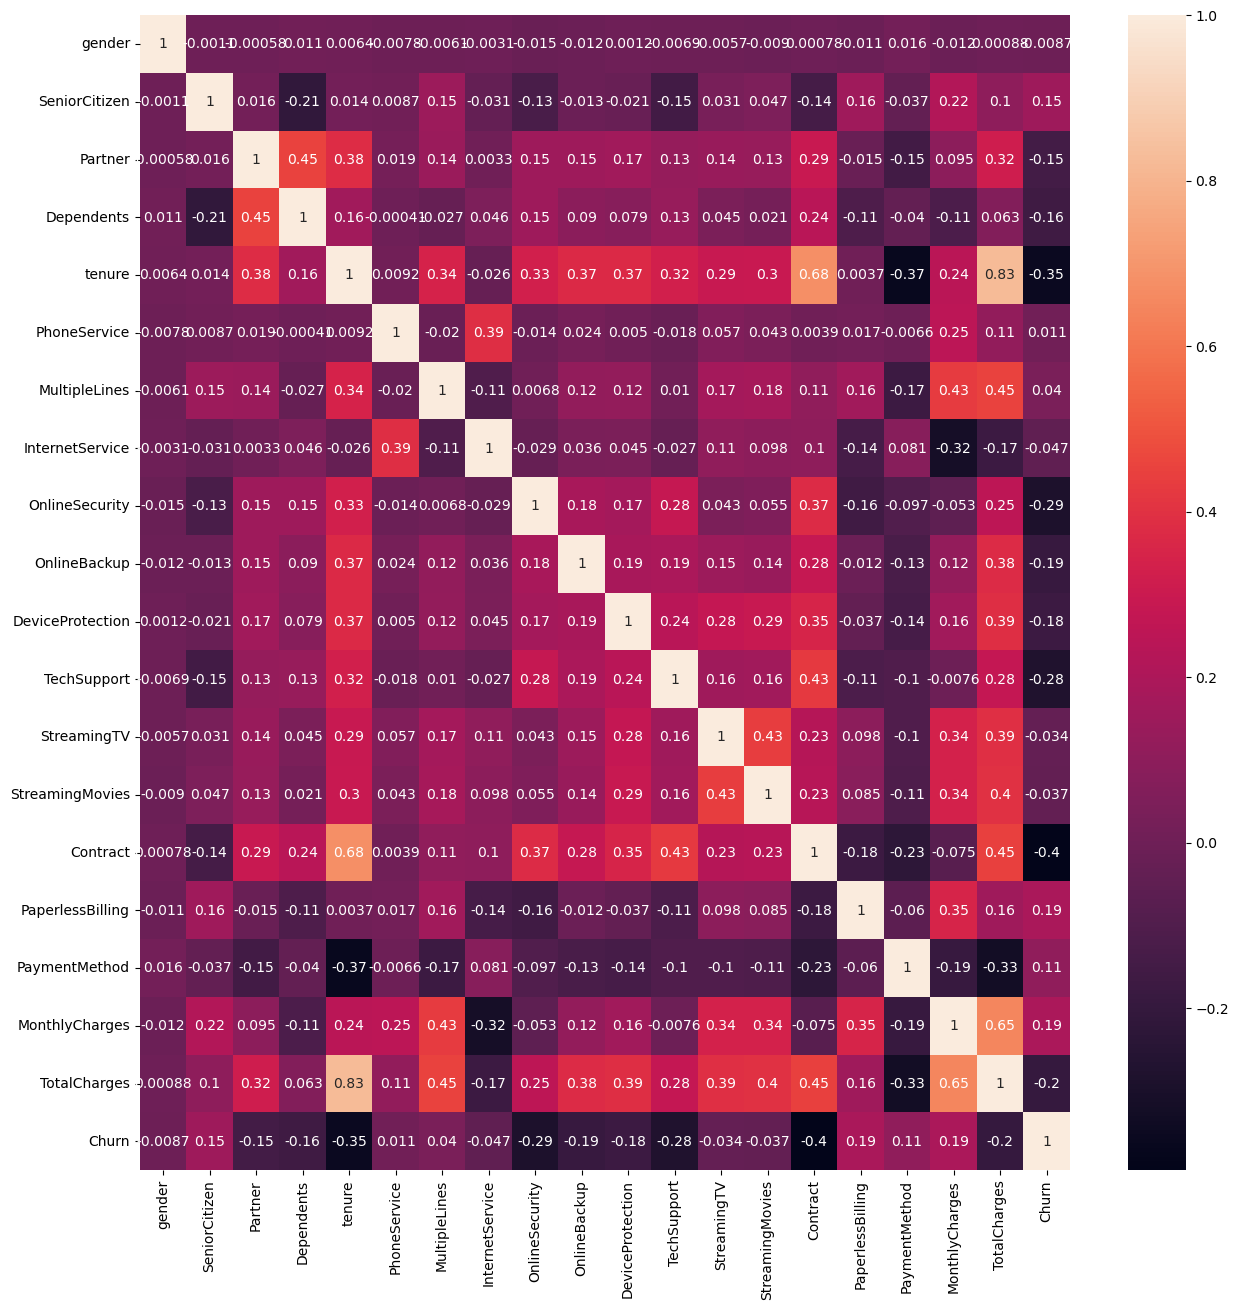

In [27]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Churn'), df['Churn'], test_size=0.2, random_state=42)

# Model Building

I will be using the following models to predict the customer churn:
1. Decision Tree Classifier
2. Random Forest Classifier
3. K Nearest Neighbors Classifier

# Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtree  = DecisionTreeClassifier()

# Hyperparameter Tuning using GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

#parameter grid
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Decision Tree Classifier
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 42}


In [31]:
#Decision Tree Classifier Object with best parameters
dtree  = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=2, min_samples_split=10, random_state=42)

#Fitting the data
dtree.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', dtree.score(X_train, y_train))

#Predicting the values
d_pred = dtree.predict(X_test)

Training Accuracy:  0.8072396576319544


# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

# Hyperparameter Tuning using GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

#parameter grid
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Random Forest Classifier
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}


In [34]:
#Random Forest Classifier Object with best parameters
rfc = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=2, random_state=42)

#Fitting the data
rfc.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', rfc.score(X_train, y_train))

#Predicting the values
r_pred = rfc.predict(X_test)

Training Accuracy:  0.8309557774607703


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

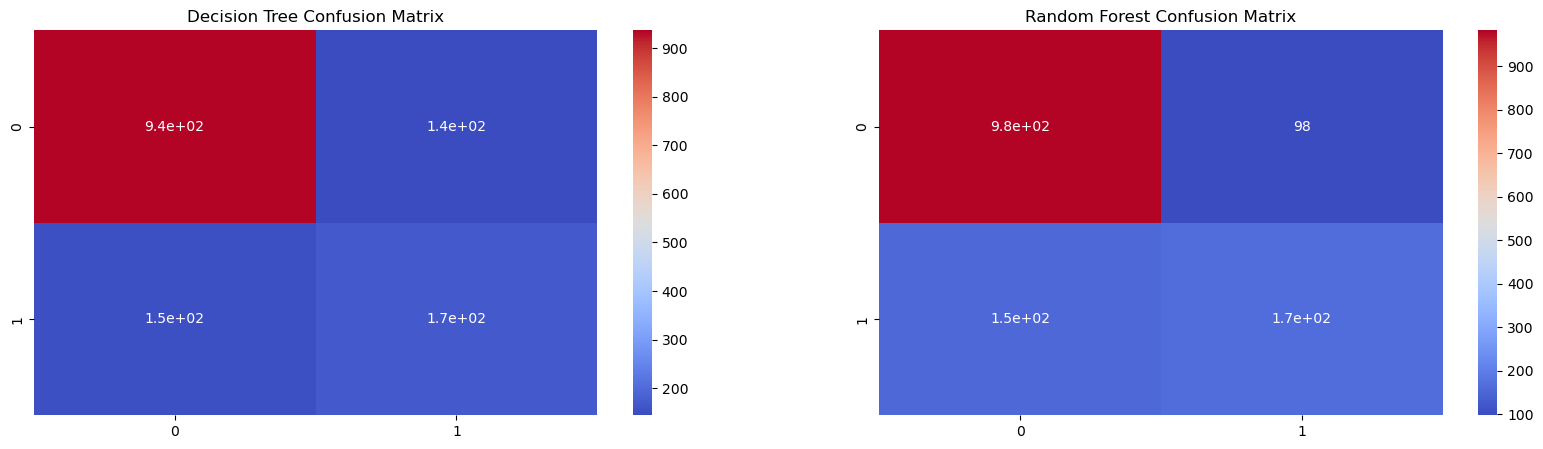

In [35]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

#Decision Tree Confusion Matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, ax=ax[0], cmap='coolwarm').set_title('Decision Tree Confusion Matrix')

#Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, ax=ax[1], cmap='coolwarm').set_title('Random Forest Confusion Matrix')

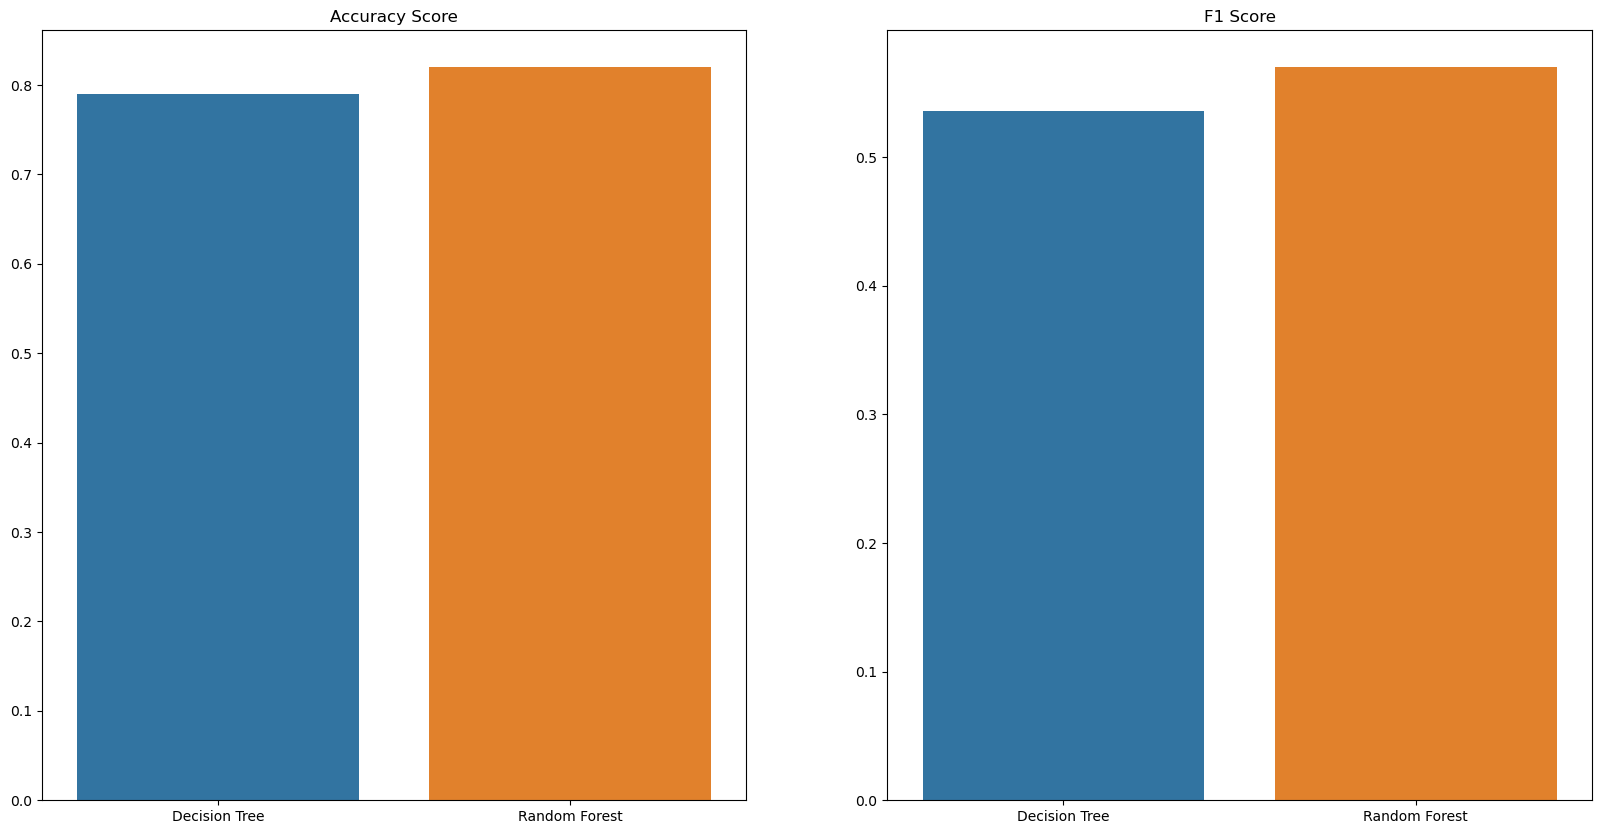

In [36]:
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Accuracy Score
sns.barplot(x=['Decision Tree', 'Random Forest'], y=[accuracy_score(y_test, d_pred), accuracy_score(y_test, r_pred)], ax=ax[0]).set_title('Accuracy Score')

# F1 Score
sns.barplot(x=['Decision Tree', 'Random Forest'], y=[f1_score(y_test, d_pred), f1_score(y_test, r_pred)], ax=ax[1]).set_title('F1 Score')

plt.show()


# Feature Importance

Text(0.5, 1.0, 'Random Forest Classifier Feature Importance')

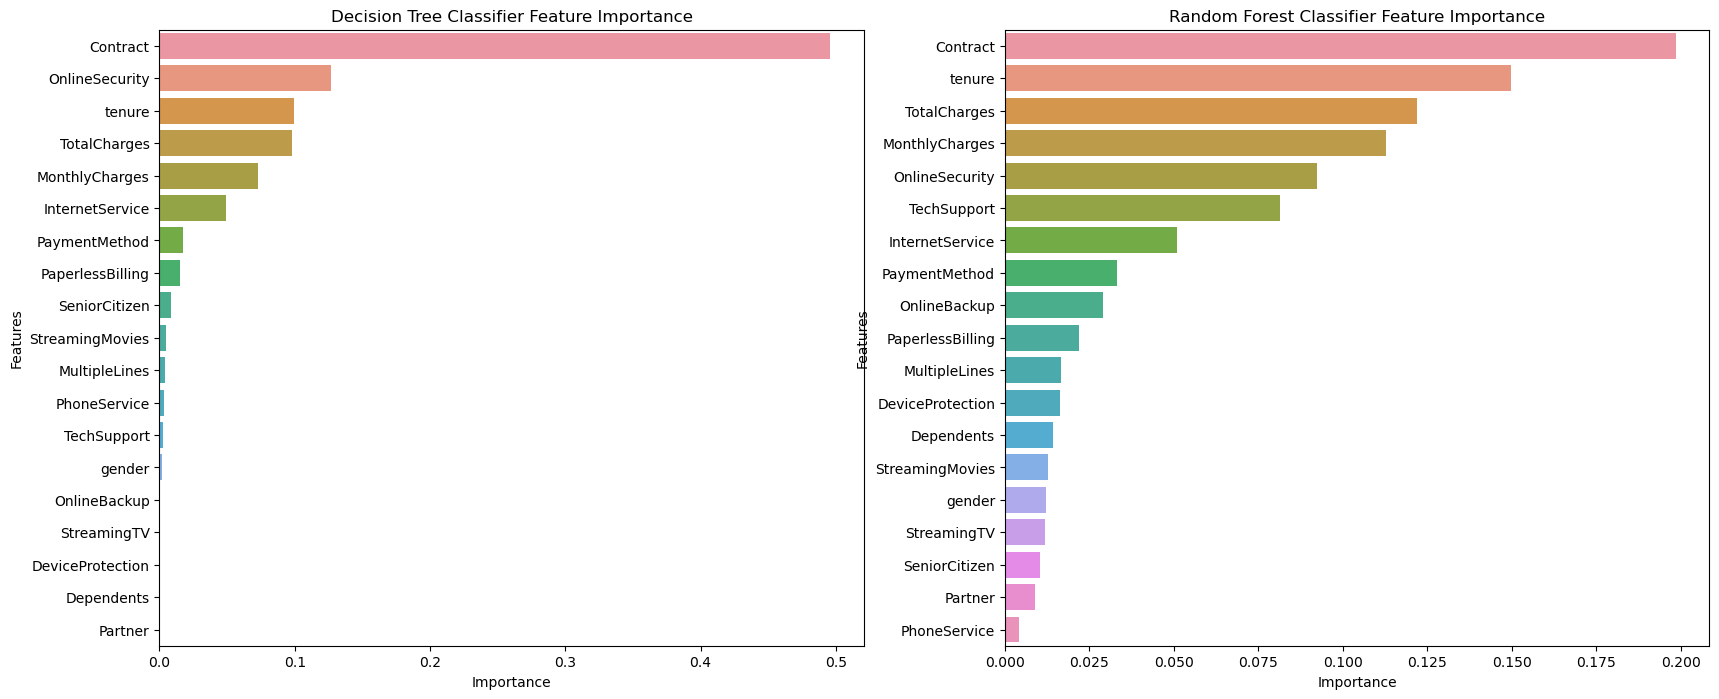

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# Decision Tree Classifier Feature Importance
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[0]).set_title('Decision Tree Classifier Feature Importance')

# Random Forest Classifier Feature Importance
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[1]).set_title('Random Forest Classifier Feature Importance')

From both the models, it is clear that the tenure, monthly charges, and total charges are the most important features for predicting the customer churn. Therefore, the company should focus on these features to reduce the customer churn.